In [2]:
# Transform the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

original_x = [0, 7, 12, 15, 17, 20, 24, 30]
original_y = [5.3, 5.2, 5.4, 5.1, 5.3, 5.2, 5.1, 5.2]

x = pd.DataFrame(original_x)
y = pd.DataFrame(original_y)

In [3]:
# Get the polynomial curve of degree 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(x)

linear_regression = LinearRegression()
linear_regression.fit(x_poly, y)
intercept, coefficient = linear_regression.intercept_, linear_regression.coef_[0]

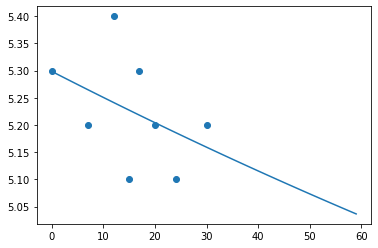

In [4]:
# Represent the curve alongside the datapoints
x_axis_representation = np.arange(0, 60)

polynomial_function = intercept[0]
for index, single_coefficient in enumerate(coefficient):
  polynomial_function += single_coefficient * (x_axis_representation ** (index + 1))

plt.plot(x_axis_representation, polynomial_function)
plt.scatter(original_x, original_y)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Create usable function
def get_polynomial_function(pace_each_day, specific_days, degree=2, model_to_use="ridge", alpha=12):

  # Transform data
  x = pd.DataFrame(specific_days)
  y = pd.DataFrame(pace_each_day)

  # Prepare and set hyperparameters
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  x_poly = polynomial_features.fit_transform(x)

  # Train model
  if model_to_use == "ridge":
    model = Ridge(alpha=alpha, solver="cholesky") # Ridge regression with polynomial features
  elif model_to_use == "lasso":
    model = Lasso(alpha=alpha) # Lasso regression with polynomial features
  elif model_to_use == "elastic_net":
    model = ElasticNet(alpha=alpha, l1_ratio=0.5) # Elastic net regression with polynomial features (mix of ridge and lasso)
  else:
    model = LinearRegression() # Using regular polynomial regression

  model.fit(x_poly, y)
  if model_to_use == "lasso" or model_to_use == "elastic_net":
    intercept, coefficients = model.intercept_[0], model.coef_
  else:
    intercept, coefficients = model.intercept_[0], model.coef_[0]

  return intercept, coefficients

def visualize_function(intercept, coefficients, pace_each_day, days_ran, number_of_future_days, label):
  plt.legend()
  x_axis_representation = np.arange(0, number_of_future_days)
  
  polynomial_function = intercept

  for index, single_coefficient in enumerate(coefficients):
    polynomial_function += single_coefficient * (x_axis_representation ** (index + 1))
  
  plt.plot(x_axis_representation, polynomial_function, label=label)
  plt.scatter(days_ran, pace_each_day)

def predict_specific_value(intercept, coefficients, day):
  polynomial_function = intercept

  for index, single_coefficient in enumerate(coefficients):
    polynomial_function += single_coefficient * (day ** (index + 1))
  
  return polynomial_function

No handles with labels found to put in legend.


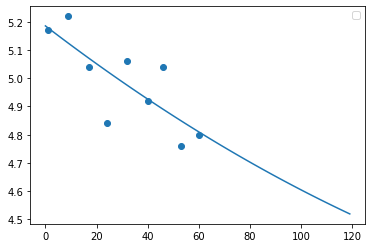

In [11]:
# # Use functions
# pace_min_per_km = [5.3, 5.2, 5.3, 5.1, 5.2, 5.1, 5.0]
# days_ran = [0, 4, 6, 8, 15, 18, 35]

# days_ran = [0, 7, 12, 15, 17, 20, 24, 30]
# pace_min_per_km = [5.3, 5.2, 5.4, 5.1, 5.3, 5.2, 5.1, 5.2]

days_ran = [1, 9, 17, 24, 32, 40, 46, 53, 60]
pace_min_per_km = [5.17, 5.22, 5.04, 4.84, 5.06, 4.92, 5.04, 4.76, 4.80]

intercept, coefficients = get_polynomial_function(pace_min_per_km, days_ran)
# intercept1, coefficients1 = get_polynomial_function(pace_min_per_km, days_ran, 2, "lasso", alpha=16)
# intercept2, coefficients2 = get_polynomial_function(pace_min_per_km, days_ran, 2, "elastic_net", alpha=16)
# intercept3, coefficients3 = get_polynomial_function(pace_min_per_km, days_ran, 2, "regular", alpha=8)

visualize_function(intercept, coefficients, pace_min_per_km, days_ran, 120, "ridge")
# visualize_function(intercept1, coefficients1, pace_min_per_km, days_ran, 120, "lasso")
# visualize_function(intercept2, coefficients2, pace_min_per_km, days_ran, 120, "elastic_net")
# visualize_function(intercept3, coefficients3, pace_min_per_km, days_ran, 120, "regular_regression")